# Class Single Recording Code

In [15]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *

In [16]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n1-240507-080133"
behavior_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Aggression\nac_csvs\n5-240821-085040.csv"

## Bout Data from CSV

In [17]:
tdt_data = tdt.read_block(single_recording_path)
tdt_data_obj = TDTData(tdt_data, single_recording_path)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n1-240507-080133\Notes.txt
read from t=0s to t=1573.39s


In [ ]:
tdt_data_obj.remove_initial_LED_artifact(t=30)
# tdt_data_obj.remove_final_data_segment(t = 10)
tdt_data_obj.smooth_and_apply(window_len=1)
tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.align_channels_raw()
tdt_data_obj.compute_dFF()
tdt_data_obj.combine_consecutive_behaviors(behavior_name='all', bout_time_threshold=2, min_occurrences=1)
tdt_data_obj.remove_short_behaviors(behavior_name='all', min_duration=1)

tdt_data_obj.compute_zscore(method = 'standard')
tdt_data_obj.extract_manual_annotation_behaviors(behavior_csv_path)
tdt_data_obj.verify_signal()

ValueError: can't extend empty axis 0 using modes other than 'constant' or 'empty'

## Plot Raw Trace

In [19]:
len(tdt_data_obj.streams['DA'])

1569866

In [20]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t = 30)
len(tdt_data_obj.streams['DA'])

1569866

In [21]:
tdt_data_obj.remove_final_data_segment(t = 30)
len(tdt_data_obj.streams['DA'])

1539348

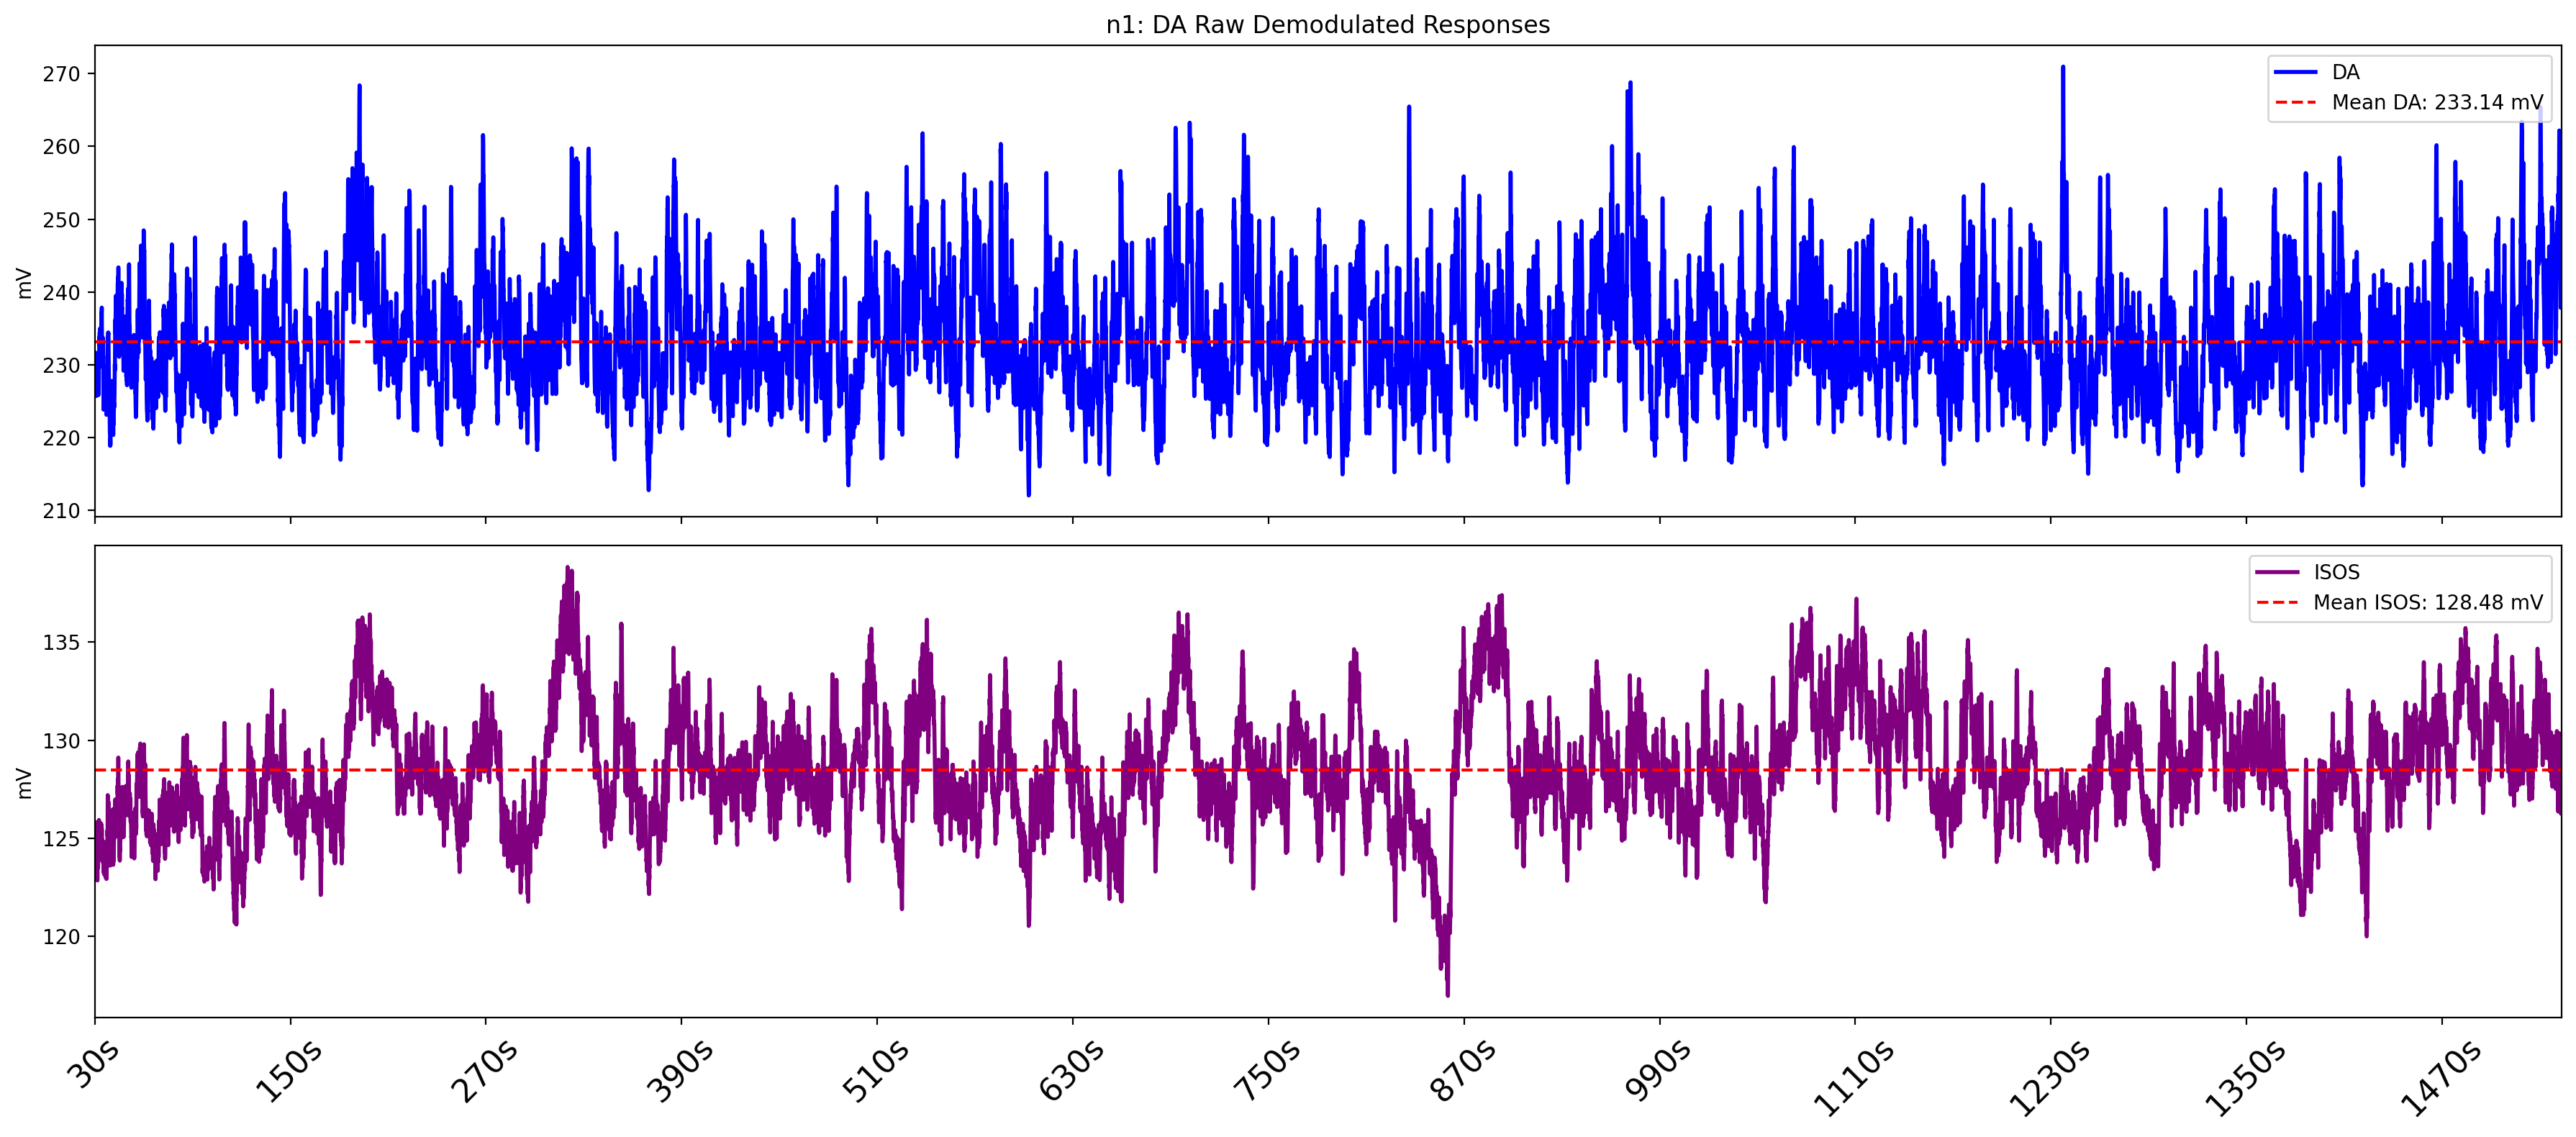

In [22]:
# Plot raw trace
tdt_data_obj.plot_signal('raw')

In [23]:
# tdt_data_obj.perform_standardization()

In [24]:
tdt_data_obj.align_channels_raw()

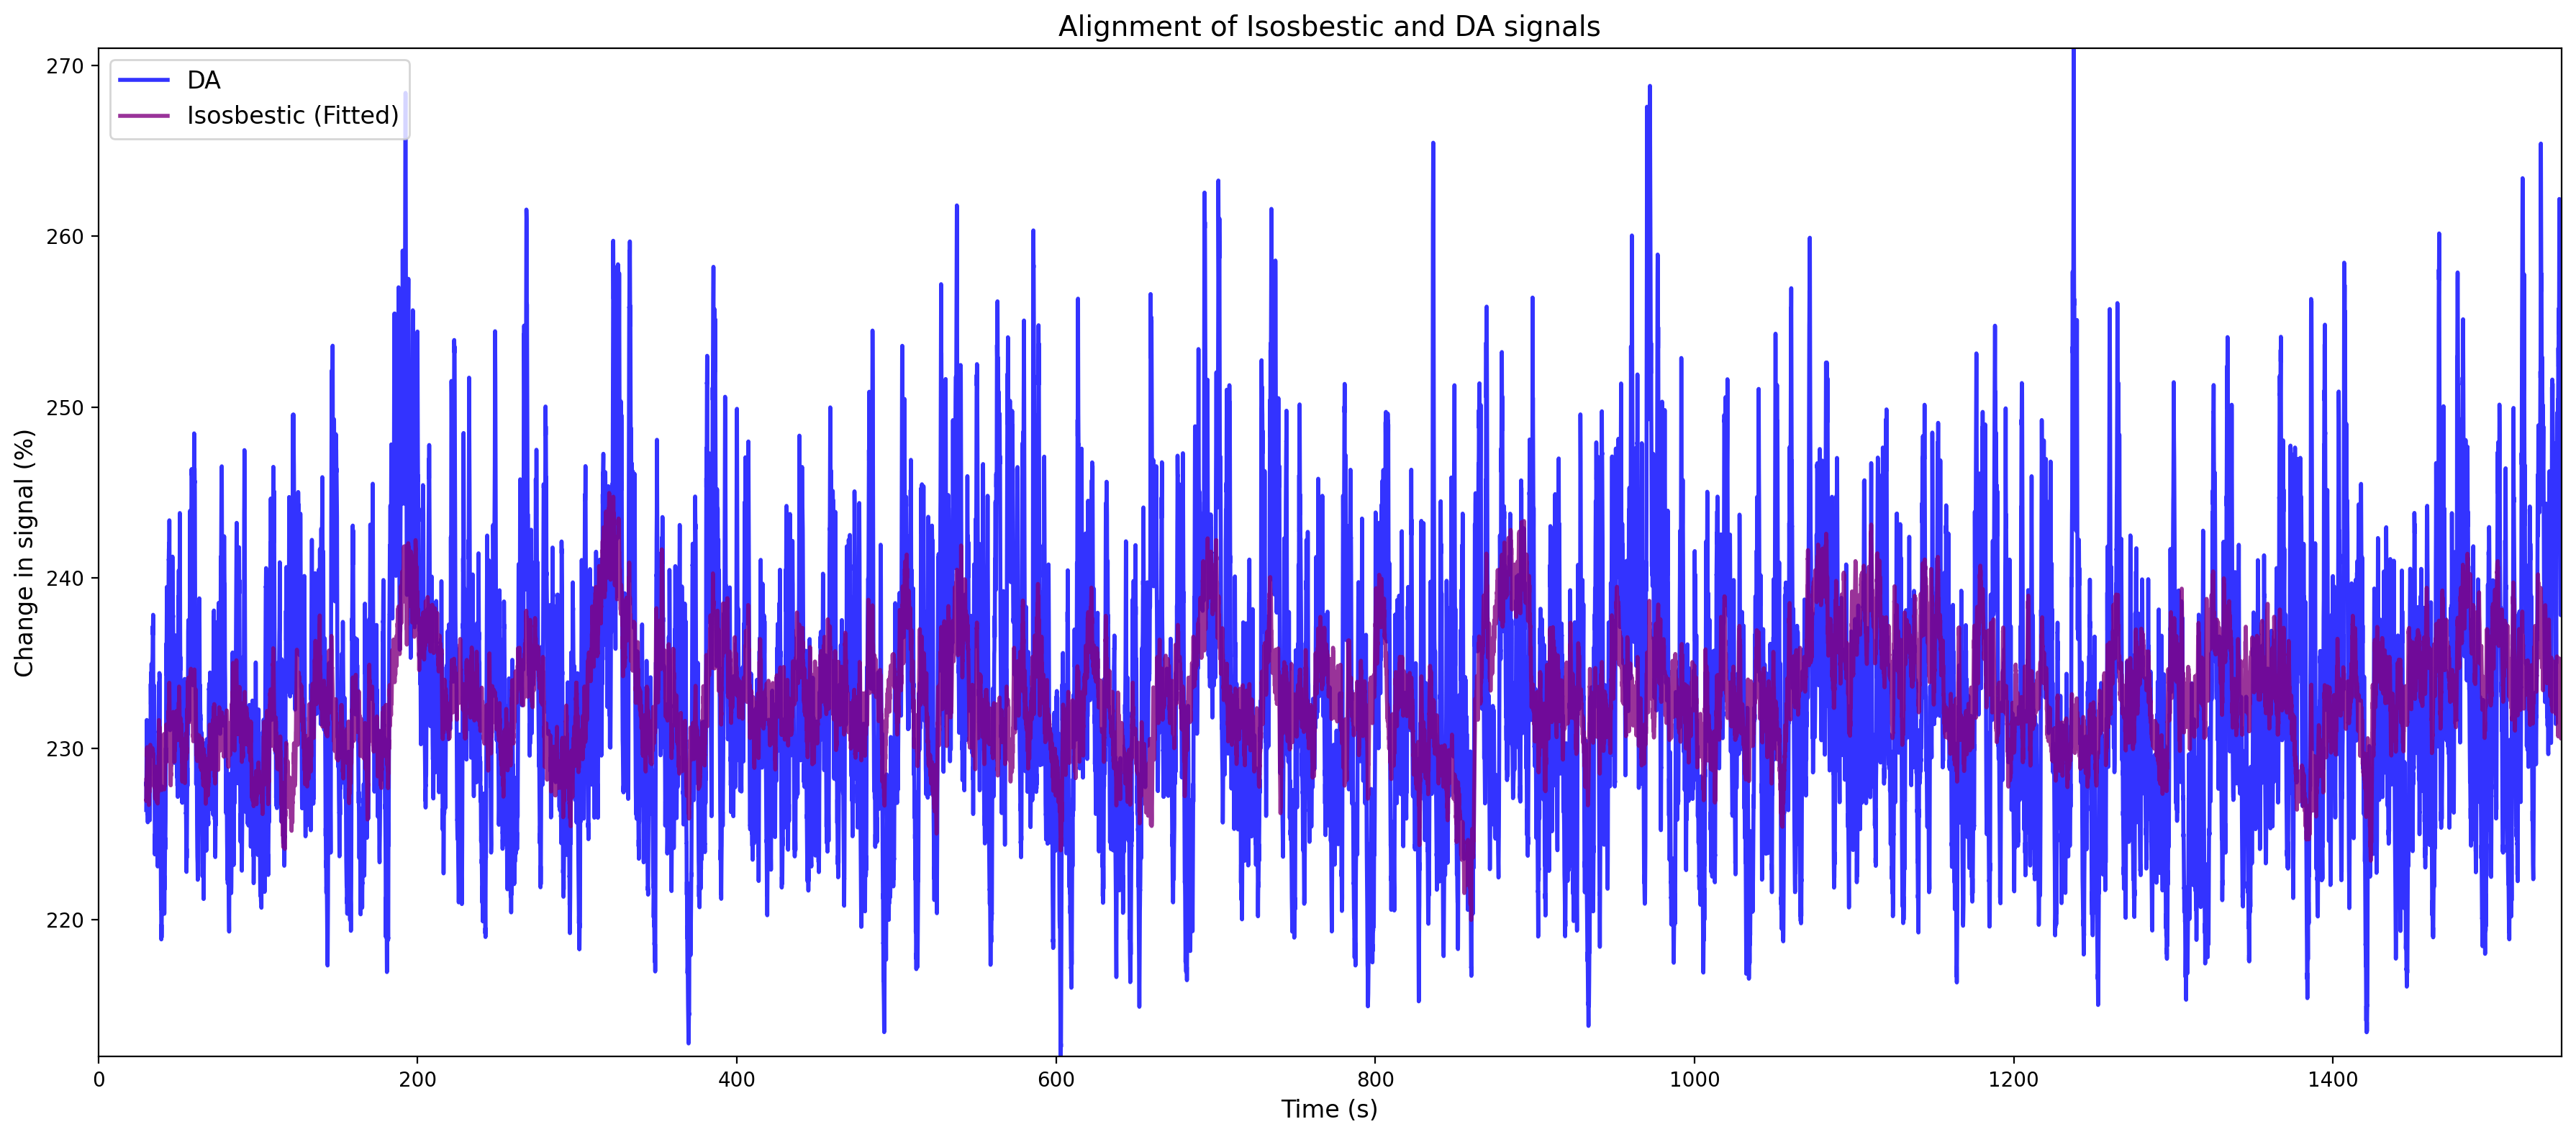

In [25]:
tdt_data_obj.plot_aligned_signals()

In [26]:
tdt_data_obj.compute_dFF()

array([-0.541687  , -0.49331665, -0.44528198, ..., 12.284256  ,
       12.305084  , 12.325562  ], dtype=float32)

In [27]:
tdt_data_obj

In [28]:
# train_times = []
# for i in range(1, len(tdt_data.epocs.Pu1_.onset)):
#     time_since = tdt_data.epocs.Pu1_.onset[i] - tdt_data.epocs.Pu1_.onset[i-1]
#     if time_since > 30:
#         train_times += [float(tdt_data.epocs.Pu1_.onset[i])]
# train_times = np.array(train_times)
 

In [29]:
# train_times

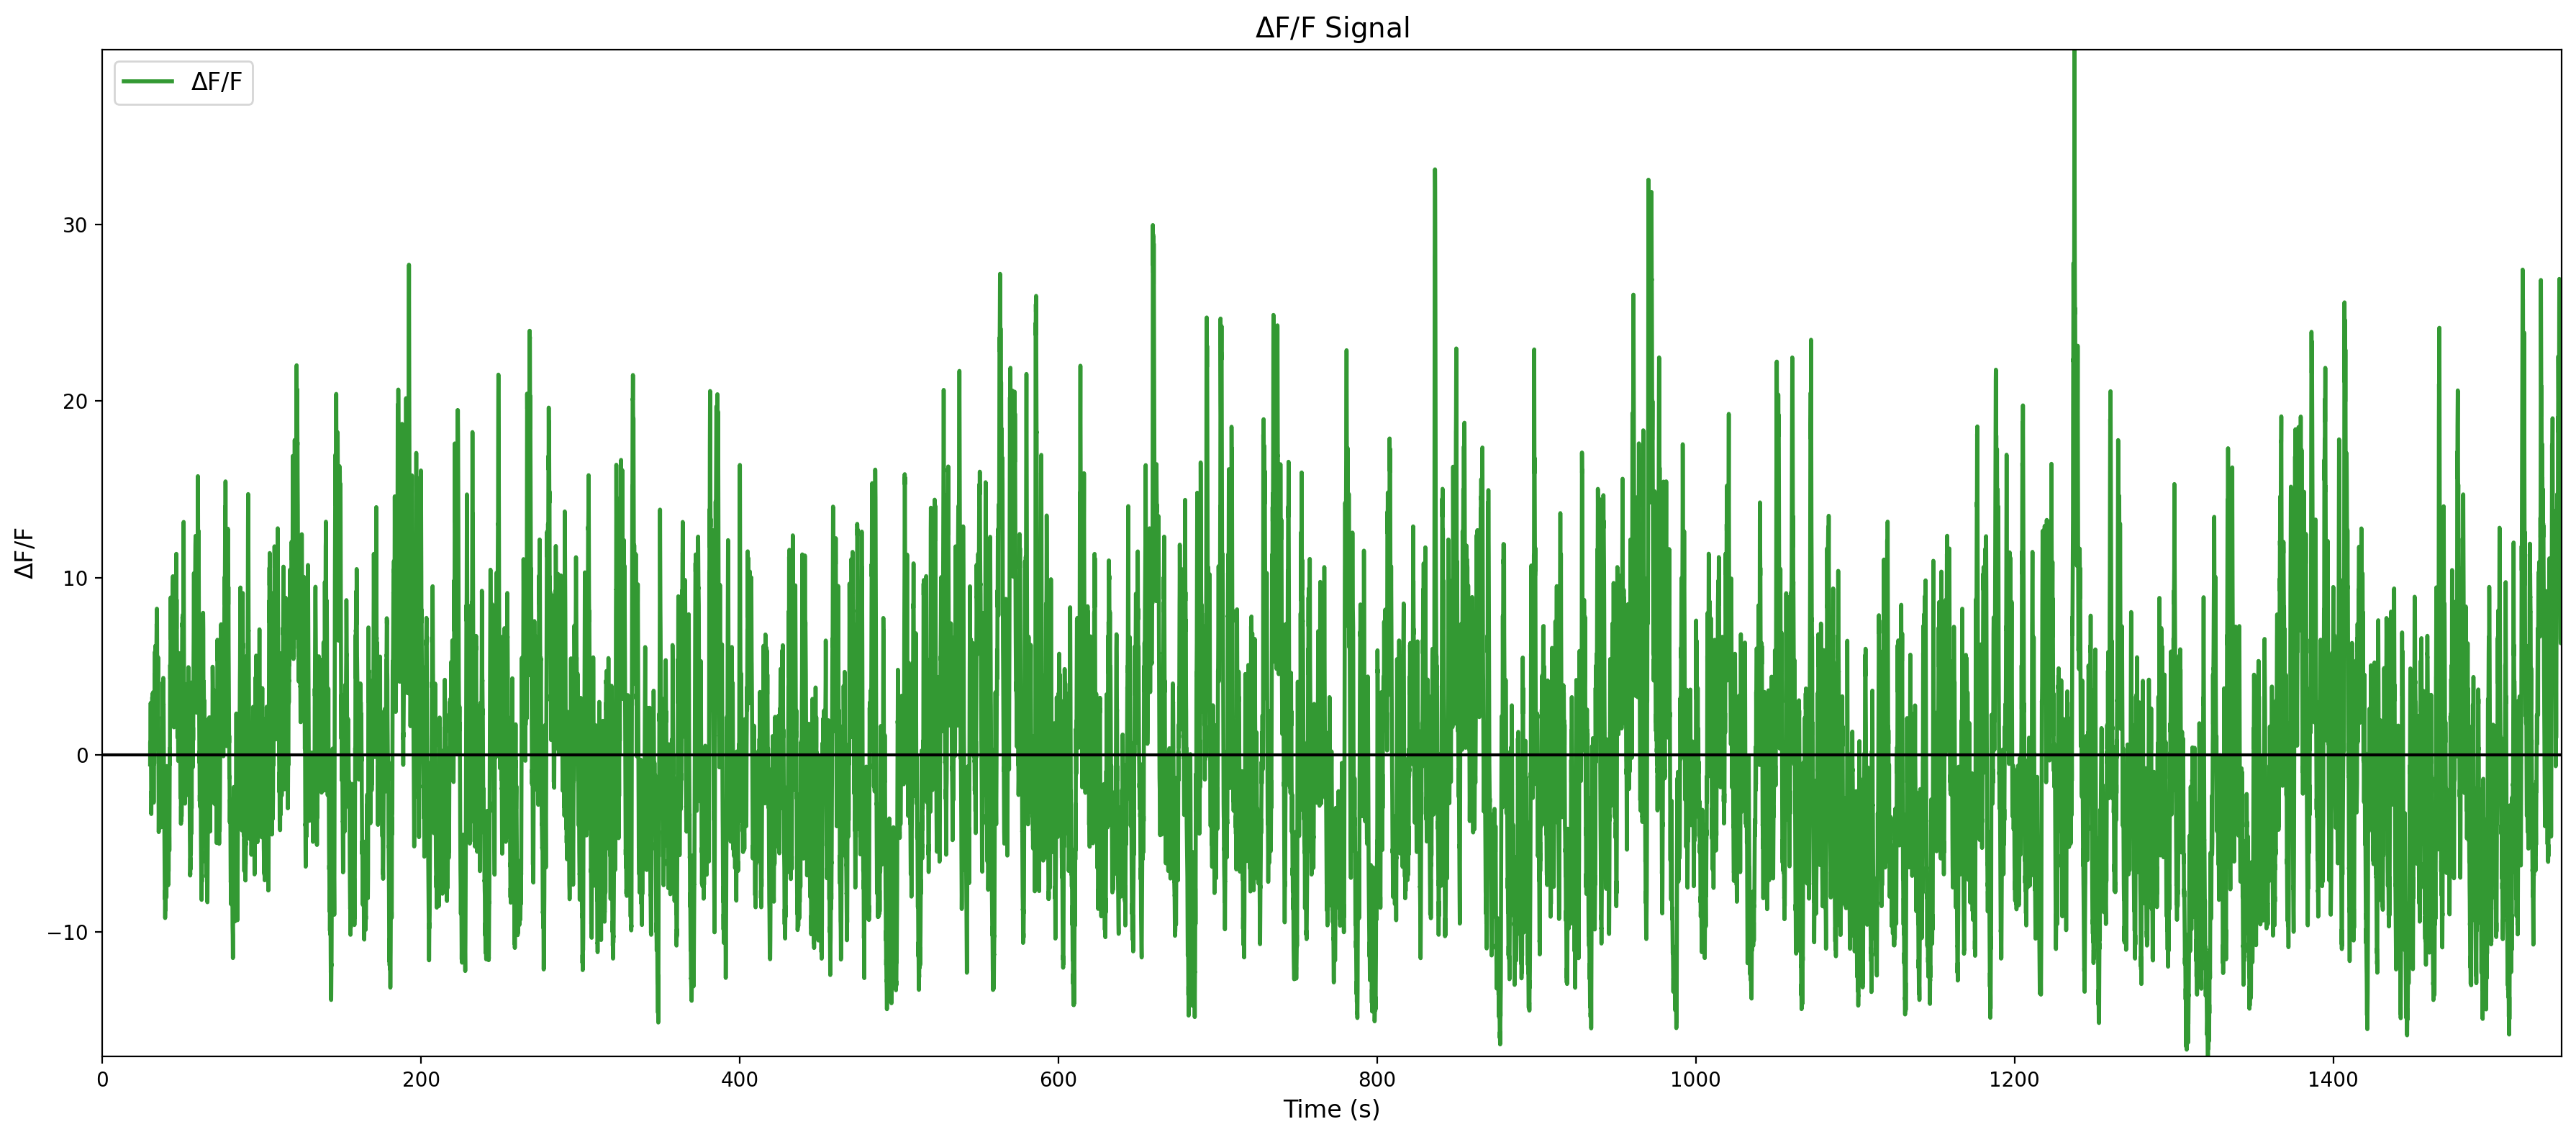

In [30]:
tdt_data_obj.plot_dFF()

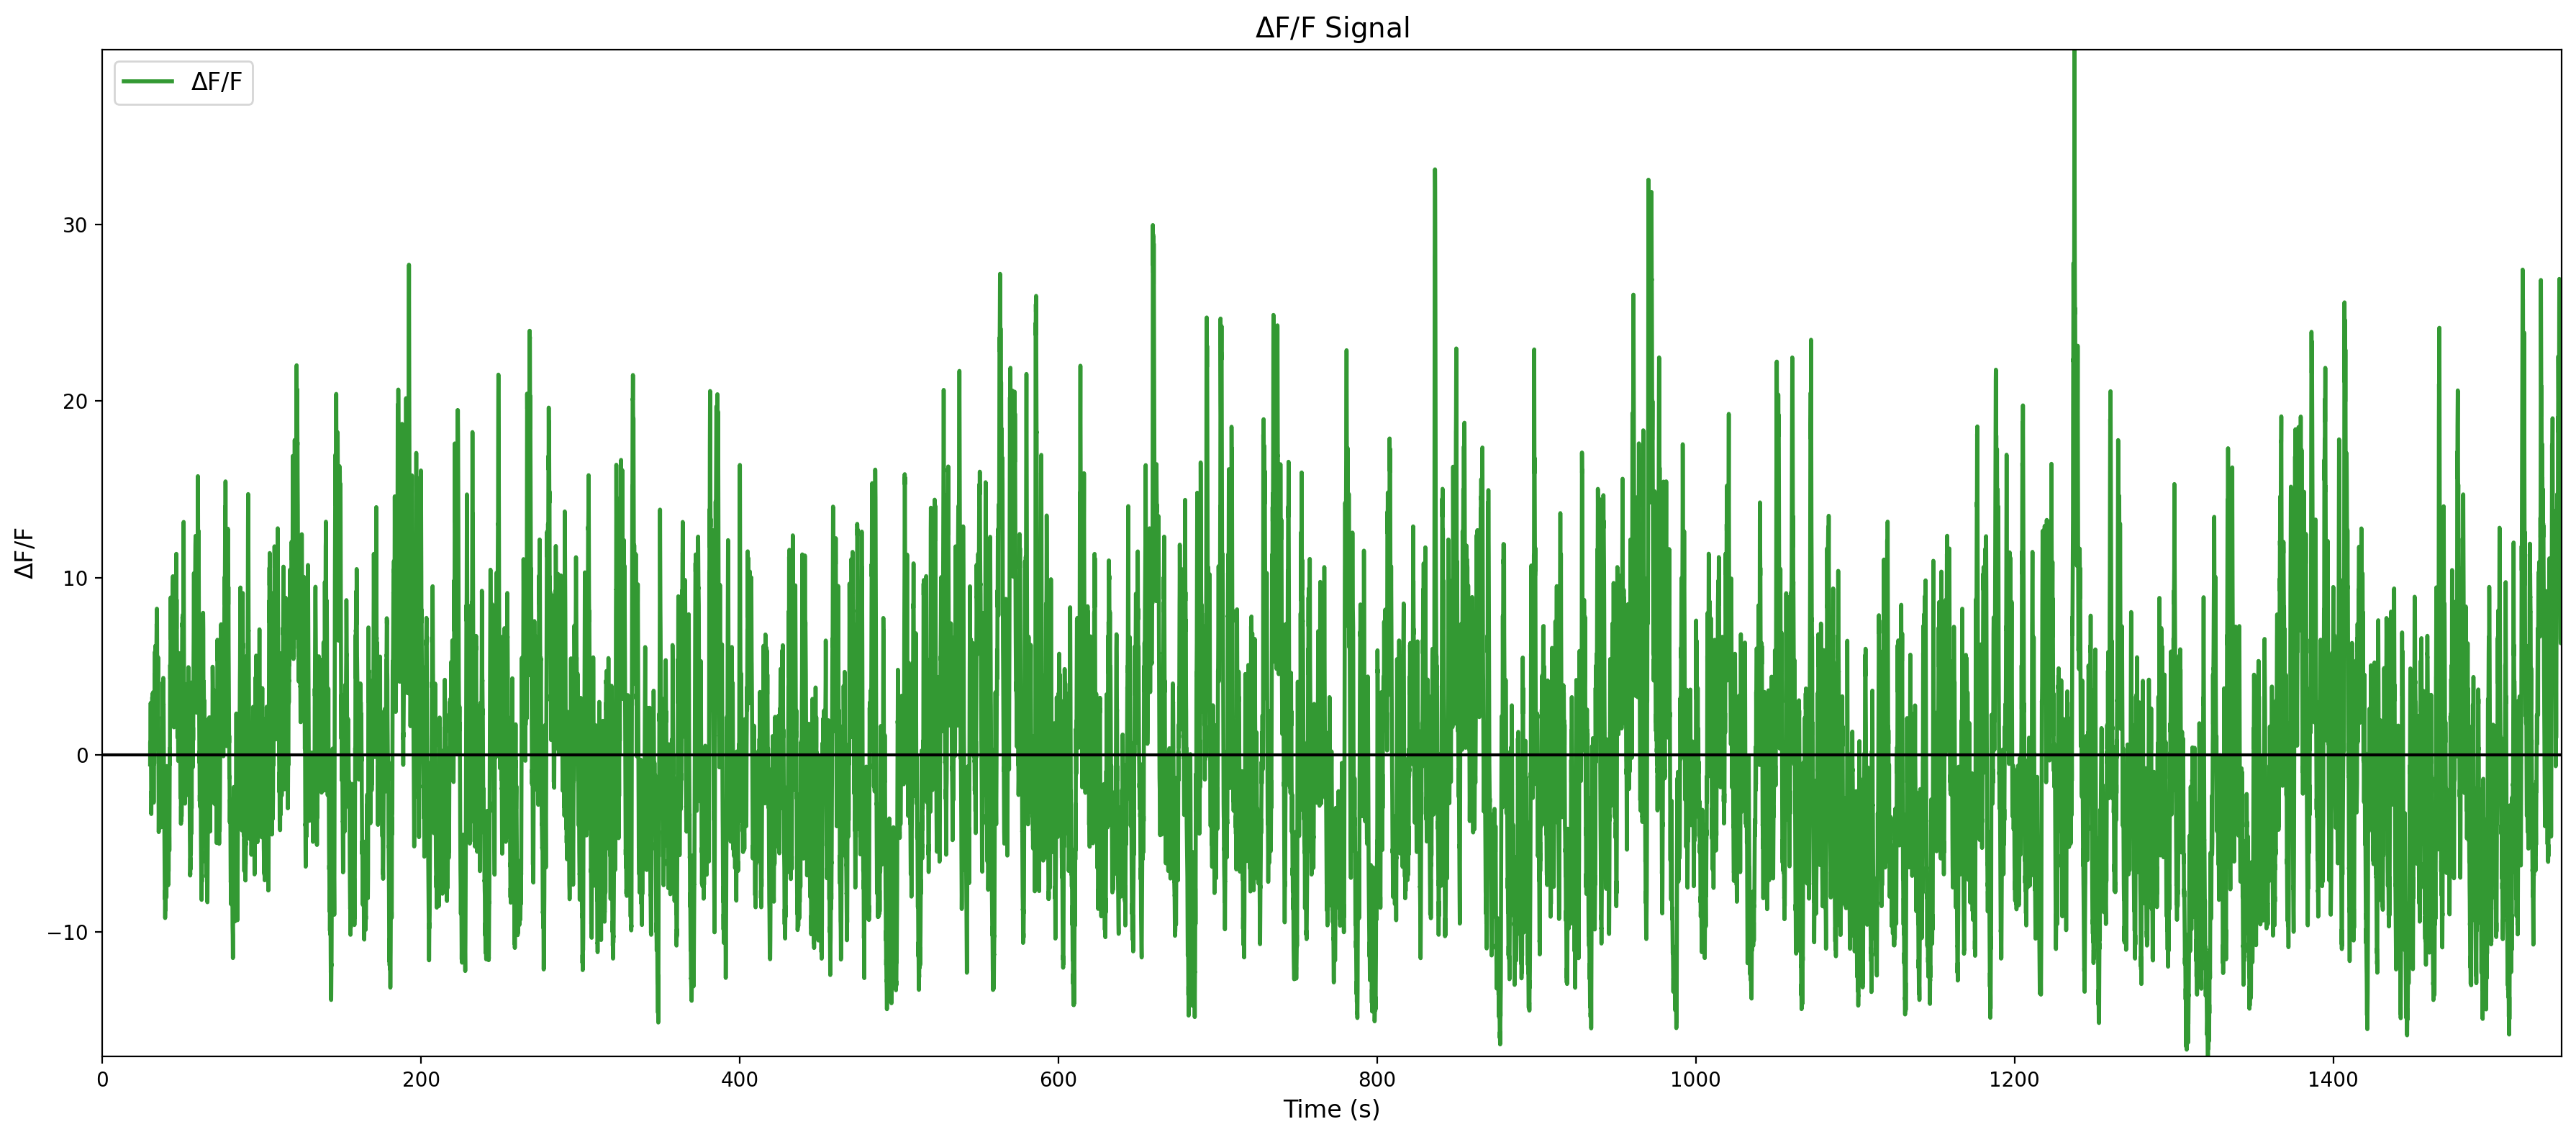

In [31]:
tdt_data_obj.plot_dFF_train_times(train_times=train_times)

In [32]:
tdt_data_obj.compute_zscore()

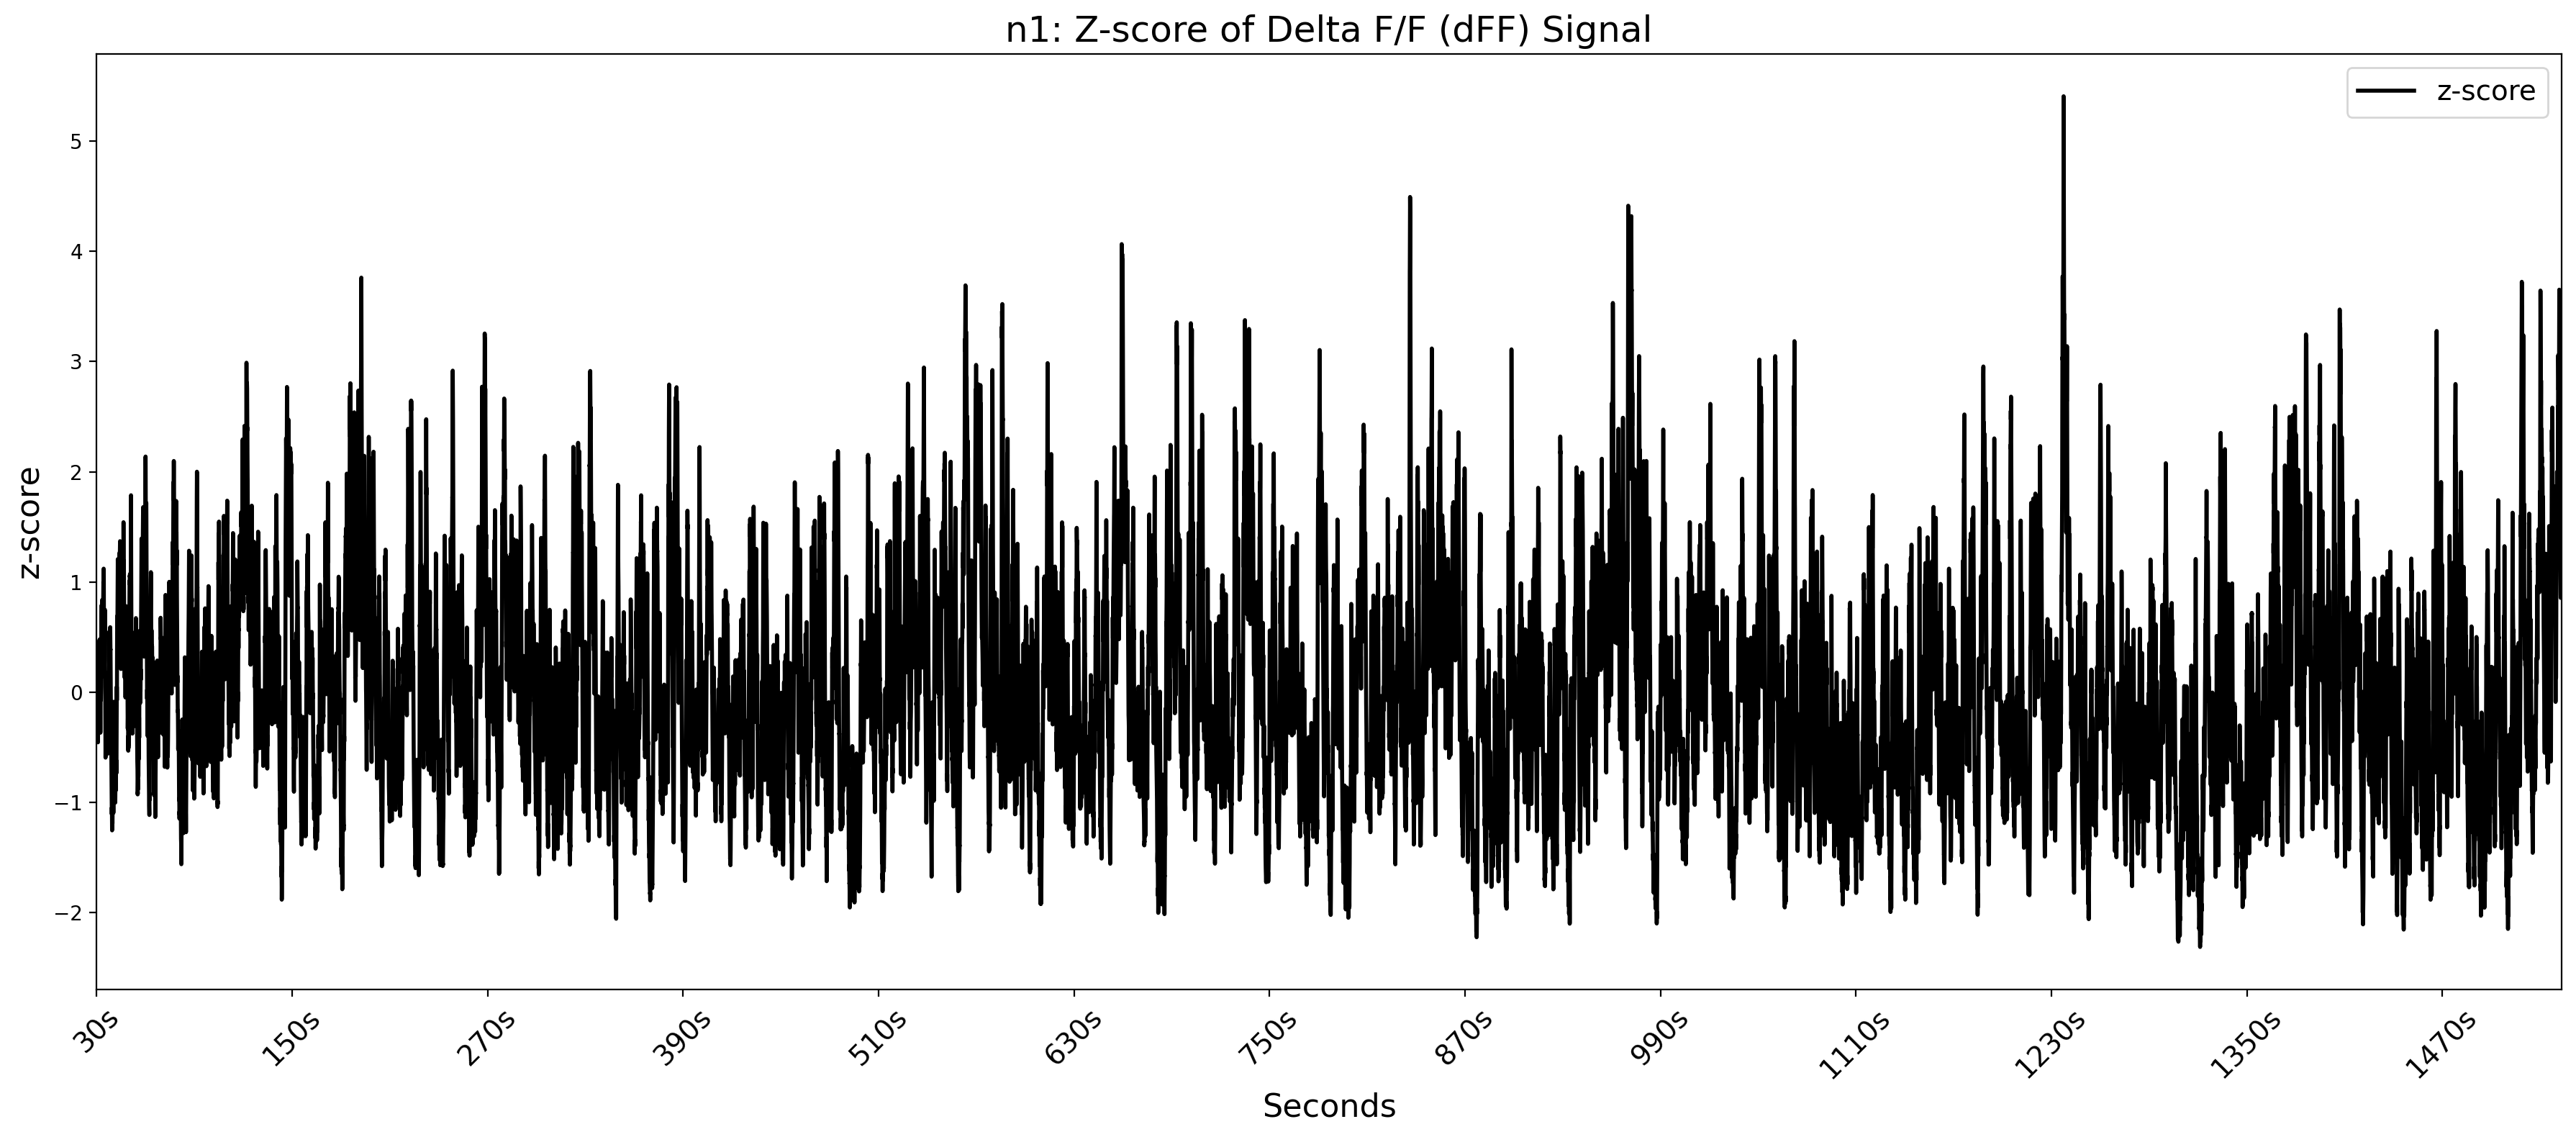

In [33]:
tdt_data_obj.plot_zscore()

## PETH

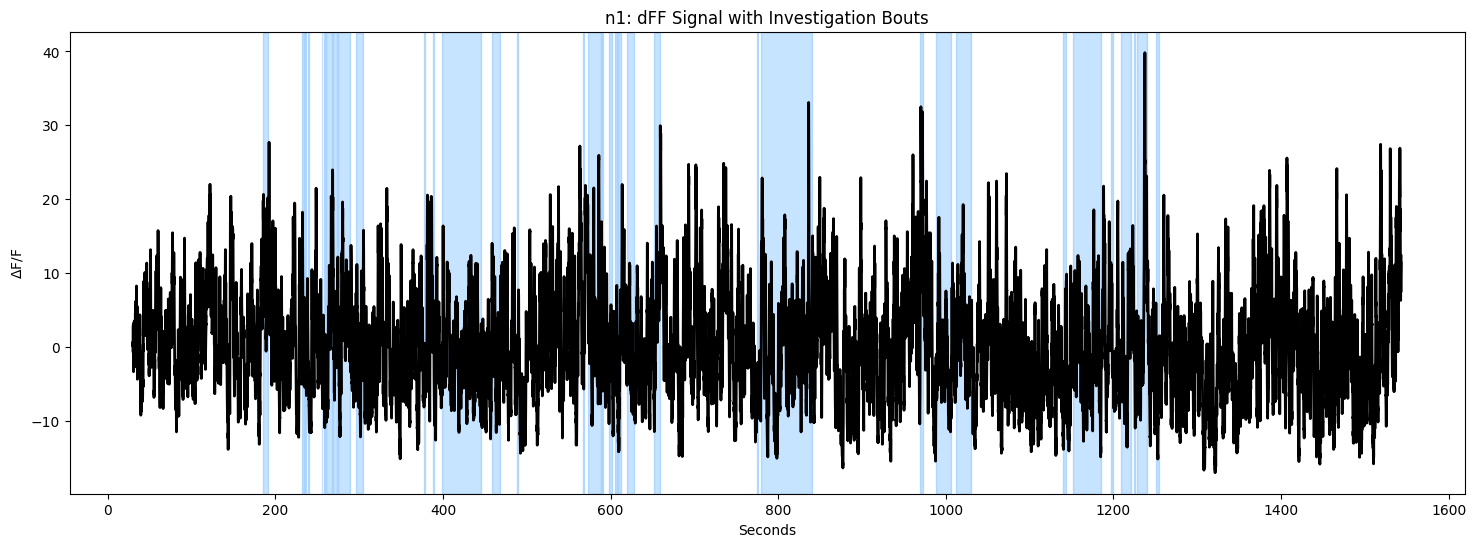

In [34]:
tdt_data_obj.plot_behavior_event(behavior_name='Investigation', plot_type='dFF')

In [35]:
tdt_data_obj.compute_first_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.05)

AttributeError: 'TDTData' object has no attribute 'compute_first_event_peth'

In [ ]:
tdt_data_obj.plot_first_event_peth(signal_type='zscore')

In [ ]:
tdt_data_obj.compute_1st_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.1)

In [ ]:
tdt_data_obj.plot_1st_event_peth(signal_type='zscore')

Old method

In [ ]:
# # Downsample the data
# # tdt_data_obj.downsample_data(N = 16)

# # Compute dFF
# tdt_data_obj.compute_dff()
# tdt_data_obj.plot_signal('dFF')
# tdt_data_obj.compute_zscore()
# tdt_data_obj.print_behaviors()

## Mean DA during first of each behavior

In [ ]:
# tdt_data_obj.hab_dishab_extract_intruder_bouts(csv_base_path)
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.smooth_signal()
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.hab_dishab_find_behavior_events_in_bout()
# # tdt_data_obj.hc_get_first_behavior()
# tdt_data_obj.bout_dict